In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
import warnings; warnings.filterwarnings('ignore')
%matplotlib inline

C:\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
df_train = pd.read_csv("./train.csv")

In [13]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [19]:
df_train['YearBuilt'].value_counts()

2006    67
2005    64
2004    54
2007    49
2003    45
        ..
1906     1
1911     1
1913     1
1917     1
1872     1
Name: YearBuilt, Length: 112, dtype: int64

In [5]:
import seaborn as sns

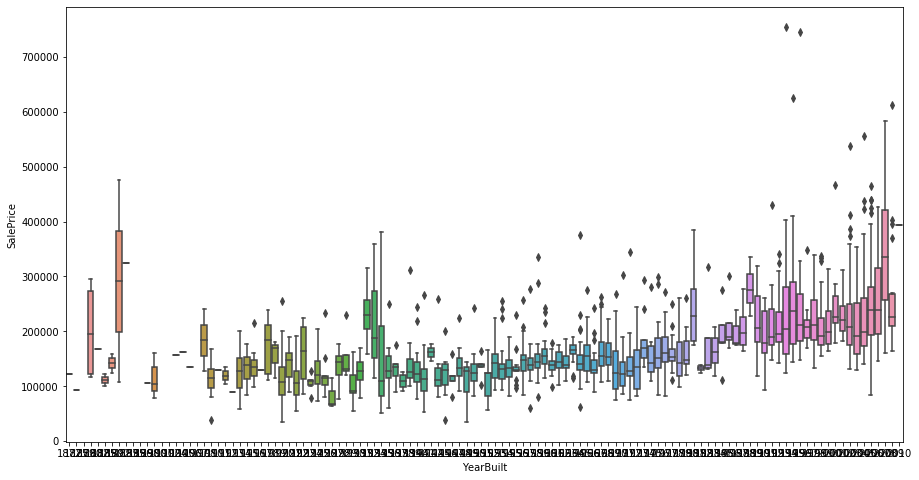

In [6]:
plt.figure(figsize=(15,8))
sns.boxplot(data.YearBuilt,data.SalePrice);

<Figure size 432x288 with 0 Axes>

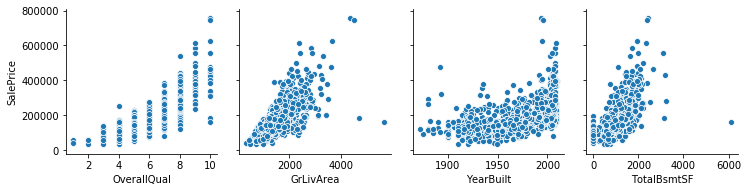

In [8]:
figure = plt.figure()
sns.pairplot(x_vars=['OverallQual','GrLivArea','YearBuilt','TotalBsmtSF'],y_vars=['SalePrice'],data=data,dropna=True);

In [11]:
data.groupby(['LotArea','Neighborhood']).size()

LotArea  Neighborhood
1300     Blueste         1
1470     MeadowV         1
1476     MeadowV         1
1477     MeadowV         2
1484     MeadowV         1
                        ..
70761    ClearCr         1
115149   ClearCr         1
159000   ClearCr         1
164660   Timber          1
215245   Timber          1
Length: 2279, dtype: int64

In [15]:
data['LotFrontage'] = data.groupby(['LotArea','Neighborhood'])['LotFrontage'].transform(lambda x:x.fillna(x.median()))

In [16]:
import pandas as pd
import numpy as np

ipl_data = {'Team': ['Riders', 'Riders', 'Devils', 'Devils', 'Kings',
         'kings', 'Kings', 'Kings', 'Riders', 'Royals', 'Royals', 'Riders'],
         'Rank': [1, 2, 2, 3, 3,4 ,1 ,1,2 , 4,1,2],
         'Year': [2014,2015,2014,2015,2014,2015,2016,2017,2016,2014,2015,2017],
         'Points':[876,789,863,673,741,812,756,788,694,701,804,690]}
df = pd.DataFrame(ipl_data)

grouped = df.groupby('Team')
score = lambda x: (x - x.mean()) / x.std()*10
print (grouped.transform(score))
print (grouped['Rank'].transform(score))

         Rank       Year     Points
0  -15.000000 -11.618950  12.843272
1    5.000000  -3.872983   3.020286
2   -7.071068  -7.071068   7.071068
3    7.071068   7.071068  -7.071068
4   11.547005 -10.910895  -8.608621
5         NaN        NaN        NaN
6   -5.773503   2.182179  -2.360428
7   -5.773503   8.728716  10.969049
8    5.000000   3.872983  -7.705963
9    7.071068  -7.071068  -7.071068
10  -7.071068   7.071068   7.071068
11   5.000000  11.618950  -8.157595
0    -15.000000
1      5.000000
2     -7.071068
3      7.071068
4     11.547005
5           NaN
6     -5.773503
7     -5.773503
8      5.000000
9      7.071068
10    -7.071068
11     5.000000
Name: Rank, dtype: float64
